In [74]:
#import numpy, pandas, and matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
#read raw data 
original = pd.read_csv('./Downloads/KaggleNoShowAppointment.csv')
#change No-Show to No_show
data = original.rename(index=str, columns={'No-show': 'No_show'})
#change Hipertension to hypertension 
data = data.rename(index=str, columns={'Hipertension': 'Hypertension'})
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [76]:
#drop unnessecary columns
data = data.drop(columns = ['PatientId','AppointmentID','Neighbourhood','Scholarship'])
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,1,1,0,0,0,No


In [78]:
#change the Schedule and Appointment from string to datetime 
#then change datetime to just date with dt.date
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], infer_datetime_format=True).dt.date
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], infer_datetime_format=True).dt.date
#add a column with the date difference 
data['Difference'] = data['AppointmentDay'] - data['ScheduledDay']
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Difference
0,F,2016-04-29,2016-04-29,62,1,0,0,0,0,No,0 days
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,1,1,0,0,0,No,0 days


In [115]:
#index 'bad' data
wrong_dates = data[data['Difference'] < '0 days'].index
wrong_age = data[data['Age'] < 0].index
#remove 'bad' data
data = data.drop(wrong_age)
data = data.drop(wrong_dates)
data.describe()

,Age,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Difference
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,37.089386,0.197257,0.071869,0.030401,0.022231,0.321043,10 days 04:25:27.412889
std,23.109885,0.397929,0.258272,0.171690,0.161494,0.466879,15 days 06:07:25.262183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


In [131]:
#number of females
len(data[data['Gender'] == 'F'])

71836

In [132]:
#number of males 
len(data[data['Gender'] == 'M'])

38685

In [139]:
#ratio of male to female 
len(data[data['Gender'] == 'F'])/len(data[data['Gender'] == 'M'])

1.8569471371332558

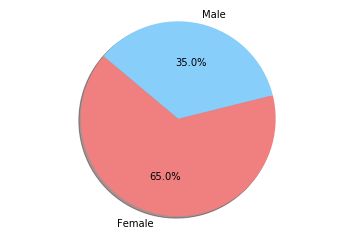

In [165]:
# Gender groups to plot
labels = 'Female', 'Male'
sizes = [len(data[data['Gender']=='F']), len(data[data['Gender']=='M'])]
colors = ['lightcoral', 'lightskyblue']

#plt graph 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1155f5b00>]],
      dtype=object)

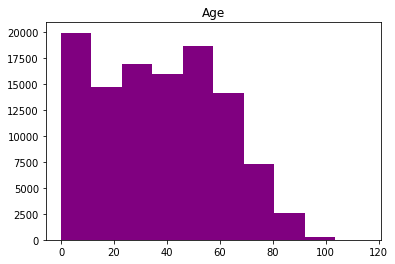

In [159]:
#histogram of the patient ages 
data.hist(column='Age', bins =10, grid=False, color='purple')

In [102]:
#catagorize the Age data 
data['Age_cat'] = pd.cut(data['Age'], bins = [-1,3,17,64,115], labels = ['baby','child','adult','senior'])
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Difference,Age_cat
0,F,2016-04-29,2016-04-29,62,1,0,0,0,0,No,0 days,adult
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No,0 days,adult
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No,0 days,adult
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No,0 days,child
4,F,2016-04-29,2016-04-29,56,1,1,0,0,0,No,0 days,adult


In [150]:
#show crosstabulation of the ages and the gener for only people how did not show 
cross_age = pd.crosstab([data.Age_cat],[data.No_show])
cross_age

No_show,No,Yes
Age_cat,,
baby,7360,1583
child,14022,4413
adult,54656,14086
senior,12169,2232


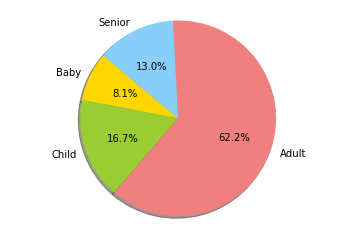

In [144]:
# Age groups to plot
labels = 'Baby', 'Child', 'Adult', 'Senior'
sizes = [len(data[data['Age_cat']=='baby']), len(data[data['Age_cat']=='child']), len(data[data['Age_cat']=='adult']), len(data[data['Age_cat']=='senior'])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

#plt graph 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [187]:
#the people who did cancel their appointment 
only_yes = data[data['No_show']== 'Yes']
len(only_yes)

22314

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12155e898>]],
      dtype=object)

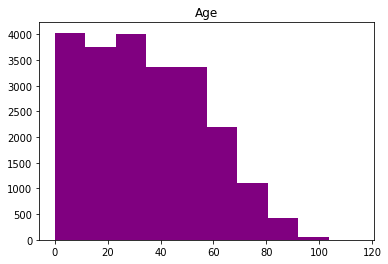

In [173]:
#histogram of the patient ages 
only_yes.hist(column='Age', bins =10, grid=False, color='purple')

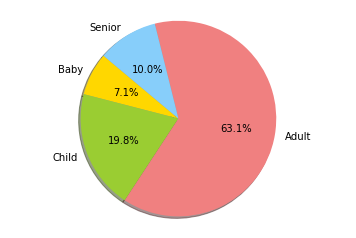

In [174]:
# Age groups to plot
labels = 'Baby', 'Child', 'Adult', 'Senior'
sizes = [len(only_yes[only_yes['Age_cat']=='baby']), len(only_yes[only_yes['Age_cat']=='child']), len(only_yes[only_yes['Age_cat']=='adult']), len(only_yes[only_yes['Age_cat']=='senior'])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

#plt graph 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [175]:
# the people who did NOT cancel their appointment 
only_no = data[data['No_show']== 'No']
len(only_no)

88207

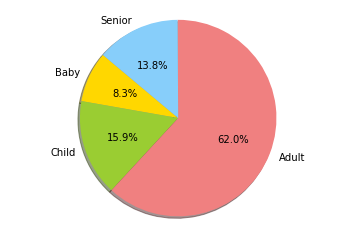

In [177]:
# Age groups to plot
labels = 'Baby', 'Child', 'Adult', 'Senior'
sizes = [len(only_no[only_no['Age_cat']=='baby']), len(only_no[only_no['Age_cat']=='child']), len(only_no[only_no['Age_cat']=='adult']), len(only_no[only_no['Age_cat']=='senior'])]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

#plt graph 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [178]:
#patients that book the day of 
day_of = len(only_yes[only_yes['Difference']== '0 days'])
print('Patients that book the day of: ',day_of)

#patients that book a week before
one_week = len(only_yes[(only_yes['Difference'] >'0 days') & (only_yes['Difference'] <= '7 days')])
print('Patients that book the within a week: ',one_week)

#patients that book more than a week more 
week_plus = len(only_yes[only_yes['Difference'] > '7 days'])
print('Patients that book more than a week before: ',week_plus)

Patients that book the day of:  1792
Patients that book the within a week:  7772
Patients that book more than a week before:  12750


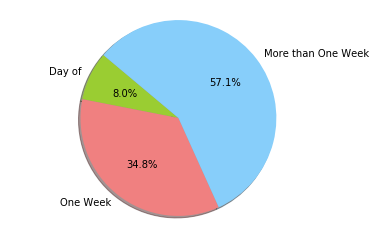

In [179]:
# Date groups to plot
labels = 'Day of', 'One Week', 'More than One Week'
sizes = [day_of, one_week, week_plus]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

#plt graph 
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [180]:
#catagorize the difference data 
#data['Date_cat'] = pd.cut(data['Difference'], bins =[(data['Difference']=='0 days'),(data['Difference']'0 days')], labels = ['day_of','one_week','week_plus'])
#data.head()

In [181]:
#cross tabulation of SMS recieved and if they showed 
cross_SMS = pd.crosstab([data.SMS_received],[data.No_show, data.Age_cat], margins = True)
cross_SMS

No_show          No                        Yes                        All
Age_cat        baby  child  adult senior  baby child adult senior        
SMS_received                                                             
0              5751  10035  38094   8629   932  2639  7595   1364   75039
1              1609   3987  16562   3540   651  1774  6491    868   35482
All           12169  14022   7360  54656  2232  4413  1583  14086  110521

In [203]:
#dataframe of only yes SMS
SMS_yes = data[data['SMS_received']==1]
len(SMS_yes)
#dataframe only no SMS 
SMS_yes_noshow = SMS_yes[SMS_yes['No_show']=='Yes']
SMS_no_noshow = SMS_yes[SMS_yes['No_show']=='No']

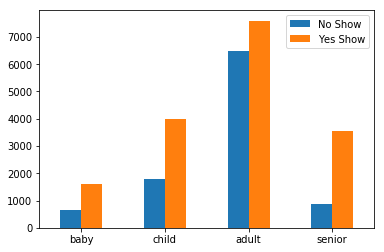

In [204]:
SMS_yes_ages = [len(SMS_yes_noshow[SMS_yes_noshow['Age_cat']=='baby']),len(SMS_yes_noshow[SMS_yes_noshow['Age_cat']=='child']),len(SMS_yes_noshow[SMS_yes_noshow['Age_cat']=='adult']),len(SMS_yes_noshow[SMS_yes_noshow['Age_cat']=='senior'])]
SMS_no_ages = [len(SMS_no_noshow[SMS_no_noshow['Age_cat']=='baby']),len(SMS_no_noshow[SMS_no_noshow['Age_cat']=='child']),len(SMS_no[SMS_no['Age_cat']=='adult']),len(SMS_no_noshow[SMS_no_noshow['Age_cat']=='senior'])]
index = ['baby', 'child', 'adult', 'senior']

df = pd.DataFrame({'No Show': SMS_yes_ages, 'Yes Show': SMS_no_ages}, index=index)
ax = df.plot.bar(rot=0)


In [206]:
#percent change of people who did not come to appointment and 
change_SMS_rec = {'No Show': SMS_yes_ages,'Yes Show':SMS_no_ages}
change_df = pd.DataFrame(data = change_SMS_rec)
change_df

,No Show,Yes Show
0,651,1609
1,1774,3987
2,6491,7595
3,868,3540


In [207]:
change_df.pct_change(axis = 'columns')

,No Show,Yes Show
0,NaN,1.471582
1,NaN,1.247463
2,NaN,0.170082
3,NaN,3.078341


In [182]:
#cross tabulation of SMS recieved and if they showed 
handcap_show = pd.crosstab([data.Handcap], data.No_show)
handcap_show

No_show,No,Yes
Handcap,,
0,86373,21909
1,1676,364
2,146,37
3,10,3
4,2,1


In [98]:
#cross tabulation of SMS recieved and if they showed 
cross_condition = pd.crosstab([only_yes.Hypertension,only_yes.Diabetes,only_yes.Alcoholism], only_yes.No_show)
cross_condition

No_show                             Yes
Hypertension Diabetes Alcoholism       
0            0        0           17833
                      1             420
             1        0             276
                      1              13
1            0        0            2433
                      1             198
             1        0            1095
                      1              46